In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [7]:
# Loading pre-defined Boston Dataset
boston_dataset = datasets.load_boston()
print(boston_dataset.DESCR)

ImportError: ignored

- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13 LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s
We can see that the input attributes have a mixture of units.

In [34]:
names=['ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','MEDIAN_PRICE']
boston_pd = pd.read_csv("http://lib.stat.cmu.edu/datasets/boston", sep="\s+", skiprows=22, header=None,names=names)
data = np.hstack([boston_pd.values[::2, :], boston_pd.values[1::2, :2]])
target = boston_pd.values[1::2, 2]

In [35]:
boston_pd

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDIAN_PRICE
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
#Load the data and divide into X and Y variable
#boston_pd = pd.DataFrame(boston_dataset.data) 
#boston_pd.columns = boston_dataset.feature_names 
#boston_pd_target = np.asarray(boston_dataset.target) 
#boston_pd['House Price'] = pd.Series(boston_pd_target) 
#boston_pd

In [36]:
boston_pd.dropna(inplace=True)

In [37]:
# input variables
X = boston_pd.iloc[:, :-1] 

#output 
Y = boston_pd.iloc[:, -1] 

In [26]:
boston_pd.shape

(506, 11)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)
                                                    
(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

((379, 10), (379,), (127, 10), (127,))

In [28]:
# Apply multiple Linear Regression Model 
lreg = LinearRegression() 
lreg.fit(x_train, y_train) 

# Generate Prediction on test set 
lreg_y_pred = lreg.predict(x_test) 

# calculating Mean Squared Error (mse) 
mean_squared_error = np.mean((lreg_y_pred - y_test)**2) 
print("Mean squared Error on test set : ", mean_squared_error) 

# Putting together the coefficient and their corrsponding variable names 
lreg_coefficient = pd.DataFrame() 
lreg_coefficient["Columns"] = x_train.columns 
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_) 
print(lreg_coefficient) 

Mean squared Error on test set :  3.0614888564575535
   Columns  Coefficient Estimate
0       ZN             -0.006466
1    INDUS             -0.035161
2     CHAS              0.071803
3      NOX             -0.605767
4       RM             -9.916134
5      AGE             -0.492081
6      DIS              0.009589
7      RAD              0.137668
8      TAX              0.085009
9  PTRATIO              0.002848


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

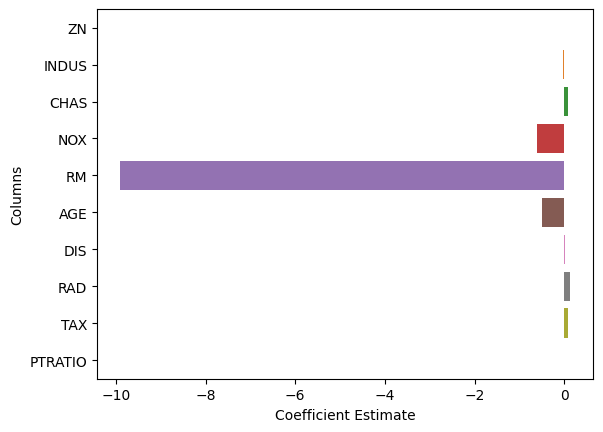

In [29]:
import seaborn as sns

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lreg_coefficient,orient='h')

In [30]:
# import ridge regression from sklearn library 
from sklearn.linear_model import Ridge 

# Train the model 
ridgeR = Ridge(alpha = 0.65) 
ridgeR.fit(x_train, y_train) 
y_pred = ridgeR.predict(x_test) 

# calculate mean square error 
mean_squared_error_ridge = np.mean((y_pred - y_test)**2) 
print(mean_squared_error_ridge) 

# get ridge coefficient and print them 
ridge_coefficient = pd.DataFrame() 
ridge_coefficient["Columns"]= x_train.columns 
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_) 
print(ridge_coefficient) 

3.0929424033202904
   Columns  Coefficient Estimate
0       ZN             -0.004539
1    INDUS             -0.036186
2     CHAS              0.057149
3      NOX             -0.670036
4       RM             -6.394986
5      AGE             -0.469578
6      DIS              0.006275
7      RAD              0.203319
8      TAX              0.075966
9  PTRATIO              0.002751


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

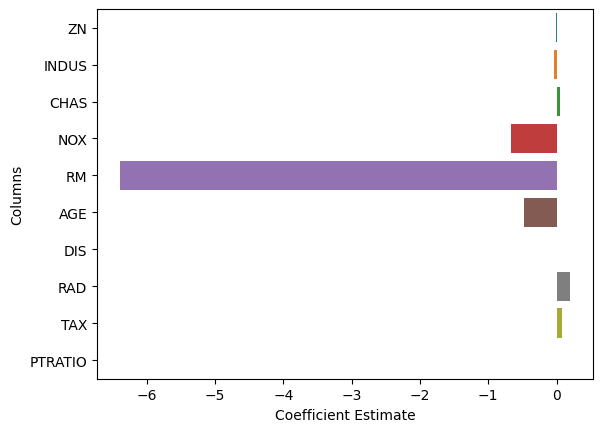

In [31]:
sns.barplot(x='Coefficient Estimate' , y='Columns', data=ridge_coefficient)

#### # import Lasso regression from sklearn library 



Mean squared error on test set 3.0613559319538717
   Columns  Coefficient Estimate
0       ZN             -0.006439
1    INDUS             -0.035172
2     CHAS              0.071651
3      NOX             -0.604903
4       RM             -9.884861
5      AGE             -0.491718
6      DIS              0.009557
7      RAD              0.138201
8      TAX              0.084899
9  PTRATIO              0.002849


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

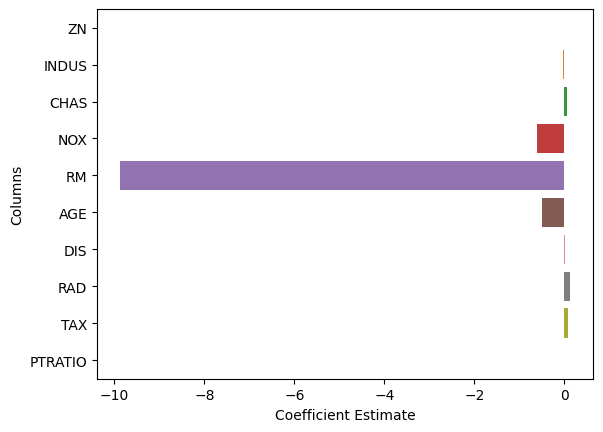

In [32]:
from sklearn.linear_model import Lasso 

# Train the model 
lasso = Lasso(alpha = 0.0001) 
lasso.fit(x_train, y_train) 
y_pred1 = lasso.predict(x_test) 

# Calculate Mean Squared Error 
mean_squared_error = np.mean((y_pred1 - y_test)**2) 
print("Mean squared error on test set", mean_squared_error) 

lasso_coeff = pd.DataFrame() 
lasso_coeff["Columns"] = x_train.columns 
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_) 

print(lasso_coeff) 

sns.barplot(x='Coefficient Estimate' , y='Columns', data=lasso_coeff)

Mean Squared Error on test set 3.162128615826992


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

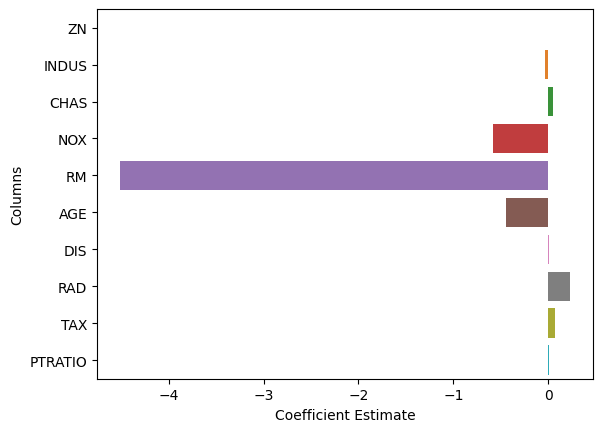

In [33]:
# import model 
from sklearn.linear_model import ElasticNet 

# Train the model 
e_net = ElasticNet(alpha = .01,l1_ratio=.8) 
e_net.fit(x_train, y_train) 

# calculate the prediction and mean square error 
y_pred_elastic = e_net.predict(x_test) 
mean_squared_error = np.mean((y_pred_elastic - y_test)**2) 
print("Mean Squared Error on test set", mean_squared_error) 

e_net_coeff = pd.DataFrame() 
e_net_coeff["Columns"] = x_train.columns 
e_net_coeff['Coefficient Estimate'] = pd.Series(e_net.coef_) 
e_net_coeff 

sns.barplot(x='Coefficient Estimate' , y='Columns', data=e_net_coeff )